In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg
from matplotlib.mlab import griddata
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def mean_std(ifile):
    
    #for each bond length compute the mean 
    #and the std
    counter = 0 
    count_elems = 0 # this is the counter elements
    end = len(ifile)
    distances = []
    results = {}
    
    for val in ifile:
        bondlength = val[0]
        distance = val[2]
        
        if counter==0:
            #a the first time, define a tmp value
            tmp = bondlength
            counter+=1
        
        if tmp!=bondlength:
            #in this case we've finished with the distance i-th
            #we are starting i-th +1
            #compute the mean value
            mean = np.mean(distances)
            std = np.std(distances)
            stderr = std/math.sqrt(len(distances))
            results[tmp] = [ mean,std,stderr]
            #empty the distances
            distances = []
            #update the tmp val
            tmp = bondlength
            distances.append(distance)
        
        if count_elems == end-1:
            #this is the last bondlength value
            mean = np.mean(distances)
            std = np.std(distances)
            stderr = std/math.sqrt(len(distances))
            results[tmp]= [mean,std,stderr]
            
        
        distances.append(distance)
        count_elems+=1
    
    return results

In [3]:
ifile = loadtxt("theta_dist.csv",delimiter=",",usecols=[0,1,2])
#first column ifile[:,0] , second ifile[:,1], third ifile[:,2]

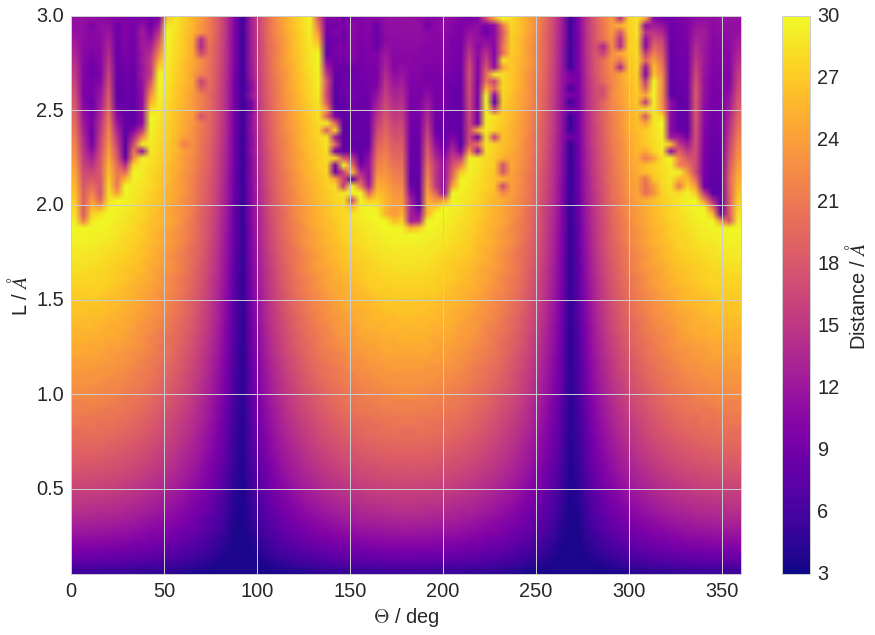

In [13]:
#Heat map

bondlength = []
theta = []
distance = [] #distance where the two curves perfectly match

for vals in ifile:
    #angle = vals[1]
    #if (angle<95 and angle>85) or (angle<275 and angle>265):
    #    continue
    #else:
    bondlength.append(vals[0])
    theta.append(vals[1])
    distance.append(vals[2])
    
    
theta = asarray(theta)
bondlength = asarray(bondlength)
distance = asarray(distance)
#now create the meshgrid
xi,yi = linspace(theta.min(),theta.max(),80) , linspace(bondlength.min(),bondlength.max(),80)
xi,yi = meshgrid(xi,yi)
#interpolate
zi = interpolate.griddata((theta,bondlength),distance,(xi,yi),method="linear")

fig,ax = plt.subplots(figsize=(15,10))
cmap="plasma"
cax = ax.imshow(zi, vmin=distance.min(), vmax=distance.max(), origin='lower',
           extent=[theta.min(), theta.max(), bondlength.min(), bondlength.max()],aspect="auto",\
          cmap=cmap )

ax.set_xlabel("$\Theta$ / deg",fontsize=20)
ax.set_ylabel(r"L / $\AA$",fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ticks = np.linspace(3.0,30.0,10.0)
cbar = fig.colorbar(cax, ticks=ticks)

#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
#cbar.set_clim(1.0, 16.0)
cbar.ax.set_ylabel(r"Distance / $\AA$",fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.savefig("HeatMap_distance.png",dpi=300)


In [14]:
mean_dict = mean_std(ifile)

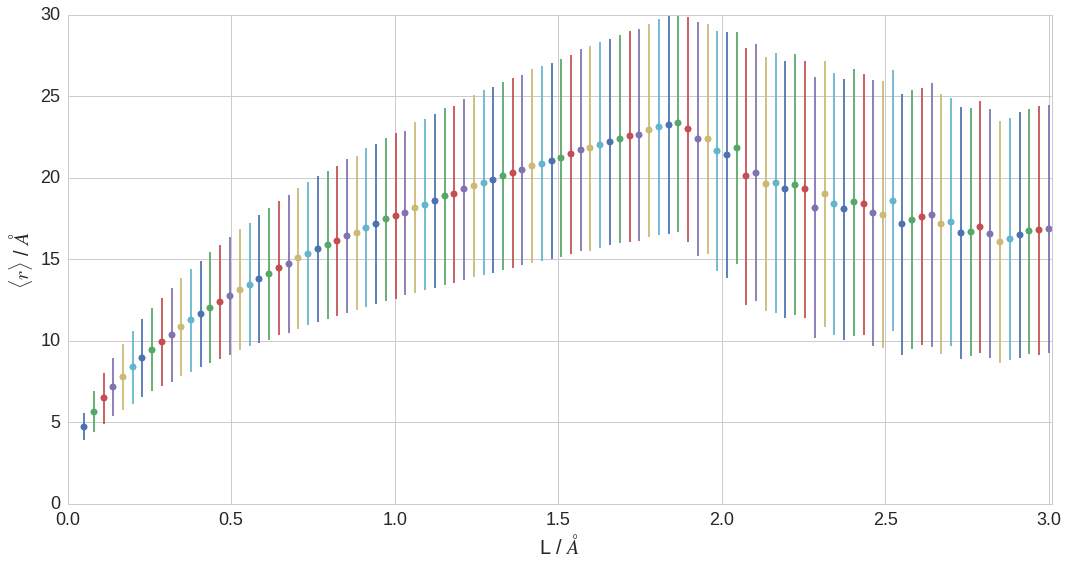

In [17]:
#plot
color = sbn.color_palette(n_colors=101)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
#we need to sort out the keys
keys = []
for key in mean_dict.keys():
    keys.append(key)

keys.sort()

counter=0
for key in keys:
    
    ax.errorbar(key,mean_dict[key][0],color=color[counter],yerr=mean_dict[key][1],marker="o")
    counter+=1

ax.set_xlabel("L / $\AA$",fontsize=20)
ax.tick_params(labelsize=18)
ax.set_ylabel(r"$\langle r\rangle$ / $\AA$" ,fontsize=20) 
ax.set_ylim(0,30)
ax.set_xlim(0,3.01)
plt.tight_layout()

plt.savefig("Mean_std_distance.png",dpi=300)

In [20]:
for key in keys:
    print(key)
    print(mean_dict[key])

0.05
[4.7355446280991789, 0.82378188760066284, 0.074889262509151164]
0.08
[5.6468049180327853, 1.2554747377740927, 0.11366534202191279]
0.11
[6.4605098360655697, 1.5439889708797583, 0.13978619336001932]
0.139
[7.1758606557377052, 1.7829479689804111, 0.16142052452663469]
0.169
[7.7749721311475399, 2.0154274417179807, 0.18246822703050192]
0.199
[8.3740770491803271, 2.221328044683228, 0.20110959173056497]
0.229
[8.9374016393442623, 2.4047987733881429, 0.21772025103082895]
0.259
[9.4560377049180353, 2.5448904252983198, 0.23040355325084566]
0.288
[9.9210213114754051, 2.7053531220747487, 0.24493116321549407]
0.318
[10.377054098360649, 2.8906612422705606, 0.26170817212515862]
0.348
[10.833090163934429, 3.0083727517290608, 0.27236527145177492]
0.378
[11.253345901639346, 3.1442277361192472, 0.28466500381713511]
0.408
[11.646795081967216, 3.2665175862761284, 0.29573660663451617]
0.437
[12.040240983606553, 3.3883586634131428, 0.30676757945173982]
0.467
[12.406860655737701, 3.4980670295239049, 0.3